In [8]:
import random
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

## Finding Distance Between Two Points

In [19]:
def distance(p1,p2):
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

## Majority Vote

In [2]:
def majority_vote(votes):
    '''
    returns a dictionary with the etiquetes and the values assigned for each of them
    '''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    return vote_counts

votes = [1,2,3,1,2,2,2,3,3,1,1,2,3,3,3,2,2,2]
vote_counts = majority_vote(votes)
max_count = max(vote_counts.values())

In [3]:
winner = []
for vote, count in vote_counts.items():
    if count == max_count:
        winner.append(vote)
       
print(random.choice(winner))

 

2


So far the function defined in the first cell returns a dict with the values assigned to the _candidates_. And in the second cell we see how to choose the winner given that dictionary.
Now lets simply join those snippets to create a whole function... like exodia.. well not that much.

In [4]:
def majority_vote(votes):
    '''
    returns the winner given a dictionary with votes. 
    If tie, a random choice ensures to return only one winner.
    '''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    max_count = max(vote_counts.values())
    winner = []
    for vote, count in vote_counts.items():
        if count == max_count:
            winner.append(vote)

    return random.choice(winner)

votes = [1,2,3,1,2,2,2,3,3,1,1,2,3,3,3,2,2,2,3,3]
majority_vote(votes)


3

## Mode of a numpy array
The video shows how to google for a question which is so important for us coders.

<b>_scipy.stats as ss_</b> have already been defined in the first cell

In [5]:
def majority_vote_short(vote):
    '''returns the most common element in votes'''
    mode , count = ss.mstats.mode(vote)
    return mode

majority_vote_short(votes)

array([2.])

At the end of the video professor Onela says that if there are more than one common element, _ss.stats.mode_ will return the number 2. Find out why here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html

## Finding nearest neighbors
The pseudocode is:

   ```python
   # loop over all opints
      # compute the distance between point p and every other point
   # sort distances and return those k points that are nearest to point p
   ```

(0.5, 3.5, 0.5, 3.5)

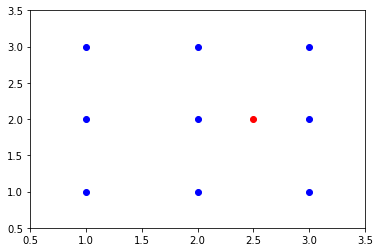

In [18]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5, 2])


plt.plot(points[:,0],points[:,1],"bo")
plt.plot(p[0], p[1],'ro')
plt.axis([0.5, 3.5 , 0.5, 3.5])


In [23]:
'''
distances = np.zeros(points.shape[0])

for i in range(len(points)):
    distances[i] = distance(p,points[i])

# np.argsort gives an array with a position of sorted values
# (from nearest to farthest). We'll sotre it in variable ind (indexes)

ind = np.argsort(distances)
ind'''

array([4, 7, 3, 5, 6, 8, 1, 0, 2])

In [25]:
# now all in a function
def find_nearest_neighbors(p,points, k=5):
    '''Find k nearest neighbors of a point and returns its indexes'''
    distances = np.zeros(points.shape[0])

    for i in range(len(points)):
        distances[i] = distance(p,points[i])

    ind = np.argsort(distances)
    return ind[:k]

ind = find_nearest_neighbors(p,points) # didn't defined k in purpose to show that: if not
                                 # defined, asign value of 5
print(points[ind])

[[2 2]
 [3 2]
 [2 1]
 [2 3]
 [3 1]]


## Classify / predicting the class of a new point

pseudocode: 

```python
# Find k nearest neighbors
# predict the class of p based on majority vote
```

In [46]:
def knn_predict(p,points, outcomes, k = 5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

outcomes = np.array([0,0,0,0,1,1,1,1,1])
#len(outcomes)
new_p = np.array([1.5,1.7])
knn_predict(new_p, points, outcomes, k=2)

0

/tmp/ipykernel_376/1718456288.py:14: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(txt, (points[:,0][i],points[:,1][i]), textcoords = 'offset points')


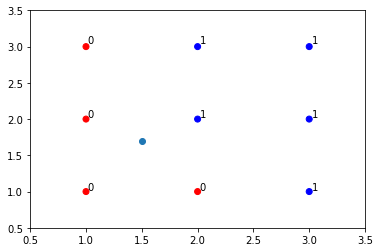

In [47]:
# lets see it graphically
colors = []
for i in range(len(outcomes)):
    if outcomes[i] == 1:
        colors.append('b')
    else:
        colors.append('r')

fig, ax = plt.subplots()
ax.scatter(points[:,0],points[:,1],c = colors)
ax.scatter(new_p[0],new_p[1],)
plt.axis([0.5, 3.5 , 0.5, 3.5])
for i, txt in enumerate(outcomes):
    ax.annotate(txt, (points[:,0][i],points[:,1][i]), textcoords = 'offset points')

## Generating Sytethic Data

In [52]:
n = 5
points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(0,1).rvs((n,2))), axis=0)
outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
outcomes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

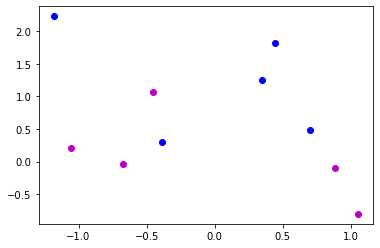

In [56]:
plt.plot(points[:n,0], points[:n,1], 'bo')
plt.plot(points[n:,0], points[n:,1], 'mo')
plt.savefig("bivardata.pdf")